<a href="https://colab.research.google.com/github/BRAHIMLOUARDI/windows/blob/main/digitANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

size=784 m=60000
[ 1.91498443 -0.88614686 -0.24922236 ... -1.87834032  1.86655133
  0.05070642]
Prediction:  [9]
Label:  7


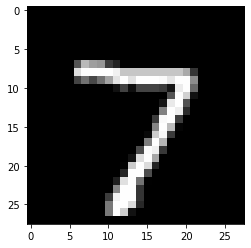

Prediction:  [5]
Label:  2


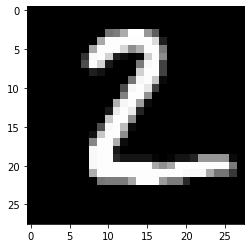

Prediction:  [8]
Label:  1


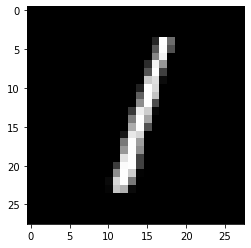

Prediction:  [9]
Label:  6


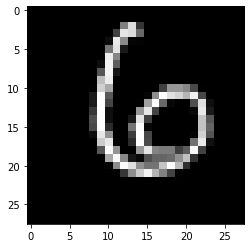

Prediction:  [5]
Label:  3


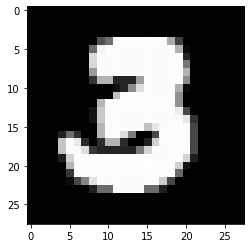

In [39]:
import pandas as pd
import numpy as np
import pickle
from keras.datasets import mnist
import matplotlib.pyplot as plt

def ReLU(Z):
    return np.maximum(Z,0)

def derivative_ReLU(Z):
    return Z > 0

def softmax(Z):
    
    exp = np.exp(Z - np.max(Z)) 
    return exp / exp.sum(axis=0)

def init_params(size):
    W1 = np.random.rand(10,size) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

def forward_propagation(X,W1,b1,W2,b2):
    Z1 = W1.dot(X) + b1 #10, m
    
    A1 = ReLU(Z1) # 10,m
    Z2 = W2.dot(A1) + b2 #10,m
    A2 = softmax(Z2) #10,m
    return Z1, A1, Z2, A2

def one_hot(Y):
    ''' return an 0 vector with 1 only in the position correspondind to the value in Y'''
    one_hot_Y = np.zeros((Y.max()+1,Y.size)) 
    one_hot_Y[Y,np.arange(Y.size)] = 1
    return one_hot_Y

def backward_propagation(X, Y, A1, A2, W2, Z1, m):
    one_hot_Y = one_hot(Y)
    dZ2 = 2*(A2 - one_hot_Y) 
    dW2 = 1/m * (dZ2.dot(A1.T)) 
    db2 = 1/m * np.sum(dZ2,1) 
    dZ1 = W2.T.dot(dZ2)*derivative_ReLU(Z1) 
    dW1 = 1/m * (dZ1.dot(X.T)) 
    db1 = 1/m * np.sum(dZ1,1) 

    return dW1, db1, dW2, db2

def update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2):
    W1 -= alpha * dW1
    b1 -= alpha * np.reshape(db1, (10,1))
    W2 -= alpha * dW2
    b2 -= alpha * np.reshape(db2, (10,1))

    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y)/Y.size

def gradient_descent(X, Y, alpha, iterations):
    size , m = X.shape
    print(f"size={size} m={m}")
    
    W1, b1, W2, b2 = init_params(size)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        print(f"{Z1[0]}")
        break
        dW1, db1, dW2, db2 = backward_propagation(X, Y, A1, A2, W2, Z1, m)
    
    
 
        W1, b1, W2, b2 = update_params(alpha, W1, b1, W2, b2, dW1, db1, dW2, db2)   

        if (i+1) % int(iterations/10) == 0:
            print(f"Iteration: {i+1} / {iterations}")
            prediction = get_predictions(A2)
            print(f'{get_accuracy(prediction, Y):.3%}')
    return W1, b1, W2, b2

def make_predictions(X, W1 ,b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    predictions = get_predictions(A2)
    return predictions

def show_prediction(index,X, Y, W1, b1, W2, b2):
   
    vect_X = X[:, index,None]
    prediction = make_predictions(vect_X, W1, b1, W2, b2)
    label = Y[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = vect_X.reshape((WIDTH, HEIGHT)) * SCALE_FACTOR

    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()



############## MAIN ##############

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
SCALE_FACTOR = 255 
WIDTH = X_train.shape[1]
HEIGHT = X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],WIDTH*HEIGHT).T / SCALE_FACTOR
X_test = X_test.reshape(X_test.shape[0],WIDTH*HEIGHT).T  / SCALE_FACTOR

W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.15, 200)
with open("trained_params.pkl","wb") as dump_file:
    pickle.dump((W1, b1, W2, b2),dump_file)

with open("trained_params.pkl","rb") as dump_file:
    W1, b1, W2, b2=pickle.load(dump_file)
show_prediction(0,X_test, Y_test, W1, b1, W2, b2)
show_prediction(1,X_test, Y_test, W1, b1, W2, b2)
show_prediction(2,X_test, Y_test, W1, b1, W2, b2)
show_prediction(100,X_test, Y_test, W1, b1, W2, b2)
show_prediction(200,X_test, Y_test, W1, b1, W2, b2)

In [26]:
np.array([[1,2,3],[1,2,3]])


array([[1, 2, 3],
       [1, 2, 3]])